# SYSC4415 Assignment 2 – Fire Hydrant Detection 🚒

"""
Special thanks to Nader Ibrahim for assembling the dataset. For more details, please refer to the paper:

Ibrahim N, Dick K, Green JR. Computer Vision Fire Hydrant Obstruction Detection System. In2024 IEEE Canadian Conference on Electrical and Computer Engineering (CCECE) 2024 Aug 6 (pp. 799-805). IEEE.


Questions? Please use the Brightspace Discussion Board.

Deadline: See Brightspace end date.
"""

## Instructions
DO NOT wait until the last minute to complete this assignment as training the models might take longer. Also leverage the free GPU provided by colab to make your training faster.


Follow all steps carefully. Your solutions must be self-contained in this notebook. No other supplementary materials or files will be accepted. As soon as I open your notebook, I will click "Runtime" → "Run all". Ensure your notebook runs without errors and displays results clearly.


You are asked to provide both code and text to address discussion questions. For the text answers, see the markdown cells with the ❓ emoji for questions and enter your answers following the ✅ emoji.

Provide sufficient comments in your code to describe its functionality. Do not remove any necessary libraries as this will cause errors.

Download the dataset from Brightspace and store it in your Google Drive under "My Drive" (not in any subfolder). Check the file location via right-click → File Information → Details → Location.

Submit your notebook as a `.ipynb` file named: `SYSC4415W25_A2_FIRSTNAME_LASTNAME_StudentID.ipynb` on Brightspace. No other submission methods will be accepted.


## Dataset
Provided on Brightspace.

#### Dataset details:
- Training Images: 2,272  
- Validation Images: 563  
- Labels: 0 = No Fire Hydrant, 1 = Fire Hydrant  
- Imbalanced dataset (most images do not contain a hydrant).

#### Dataset Information
The dataset contains two main folders:
- `train/`: Contains the training images and a CSV file with labels.
- `valid/`: Contains the validation images and a CSV file with labels.

Each folder includes:
- Images of fire hydrants and non-fire hydrants.
- A CSV file (`_classes.csv`) mapping each image filename to its label:
  - `0` for no fire hydrant.
  - `1` for fire hydrant.

Ensure the zip file of the dataset (FH_detection_data.zip) to your Google Drive and placed under "My Drive" without any subfolders to keep the paths consistent.



## Steps

### 1) Initial Setup
Import necessary libraries


In [1]:
# Import all the necessary libraries here

import pandas as pd
import os

Mount Google Drive and unzip the dataset.

In [2]:
## Code provided by Akash. DO NOT CHANGE THIS CELL

from google.colab import drive
drive.mount('/content/drive')

# Unzip the dataset
!unzip /content/drive/MyDrive/FH_detection_data.zip -d /content/


# Dataset path
train_data_path = "/content/train"
valid_data_path = "/content/valid"
train_label = pd.read_csv('/content/train/_classes.csv')
valid_label = pd.read_csv('/content/valid/_classes.csv')

Mounted at /content/drive
Archive:  /content/drive/MyDrive/FH_detection_data.zip
   creating: /content/train/
 extracting: /content/train/10063782964_891eedde4e_z_jpg.rf.4caba9d0e35546b469aa896df780d833.jpg  
 extracting: /content/train/100_PNG.rf.d52fbff94c483761d0644a1e8abe4c95.jpg  
 extracting: /content/train/101_PNG.rf.f1335e18f815c8c8044a94c09db7f025.jpg  
 extracting: /content/train/102378468_d8132a415b_z_jpg.rf.6bc008d0d532d3365f580b7aaa7623e3.jpg  
 extracting: /content/train/102_PNG.rf.160c945e0881c92a078a14069d9a6b9a.jpg  
 extracting: /content/train/102_jpg.rf.17df75e9dda0f851c9f5e1d554f07488.jpg  
 extracting: /content/train/103357395_388d701e12_z_jpg.rf.a54c985e93402af49ba422f005e702d8.jpg  
 extracting: /content/train/103_jpg.rf.a649213f3998906bf2298607f82ee839.jpg  
 extracting: /content/train/104351403_25e959f878_z_jpg.rf.43156bd0a74313df69967d88e5e6a268.jpg  
 extracting: /content/train/104_PNG.rf.c14671a6a52ae05f9ae2bf1df7e4316e.jpg  
 extracting: /content/train/104_

----

### 2) Data Exploration
1. Load dataset into a pandas DataFrame.
2. Display display three sample images from each class
3. Two Plots for class distribution of both train and test data
[Requires 6 sample images (for two classes) and two plots of class distribution (train and test)]

❓ Why is it important to check for class imbalance before training? How might this affect our model?  
✅ Your answer here
It is important to check class imbalance so to know what type of data the model will be more likely to learn. Note if there class imbalance it will create preference or bias for certain pattern not be able catch other, making the model generalize less.


                                            filename  Fire Hydrants
0  45-394823_-75-62419684_heading270_jpg.rf.01200...              0
1  53-4733_-113-44139_heading180_jpg.rf.00a4904dd...              0
2     49_jpg.rf.00d3bdf822d633cc6d6fe5ed2c248a59.jpg              1
3  download_jpeg_jpg.rf.00666bac2a7d67fe8f26db4a7...              1
4  45-42126683_-75-64919699_heading270_jpg.rf.02d...              1
                                            filename  Fire Hydrants
0  45-41883112_-75-66552927_heading270_jpg.rf.5e3...              0
1  45-42123726_-75-65002237_heading0_jpg.rf.5e41f...              0
2  53-4765_-113-46208_heading90_jpg.rf.5ea9d57ca3...              0
3  45-41625342_-75-67819976_heading0_jpg.rf.5eba1...              0
4  45-42248701_-75-69599839_heading180_jpg.rf.698...              0
Showing images from train folder


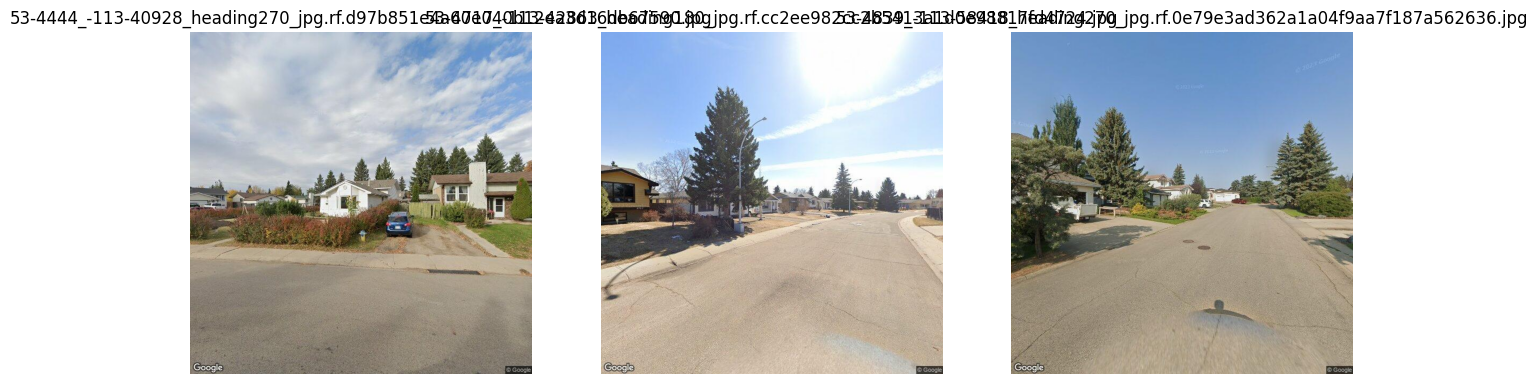

Showing images from validation folder


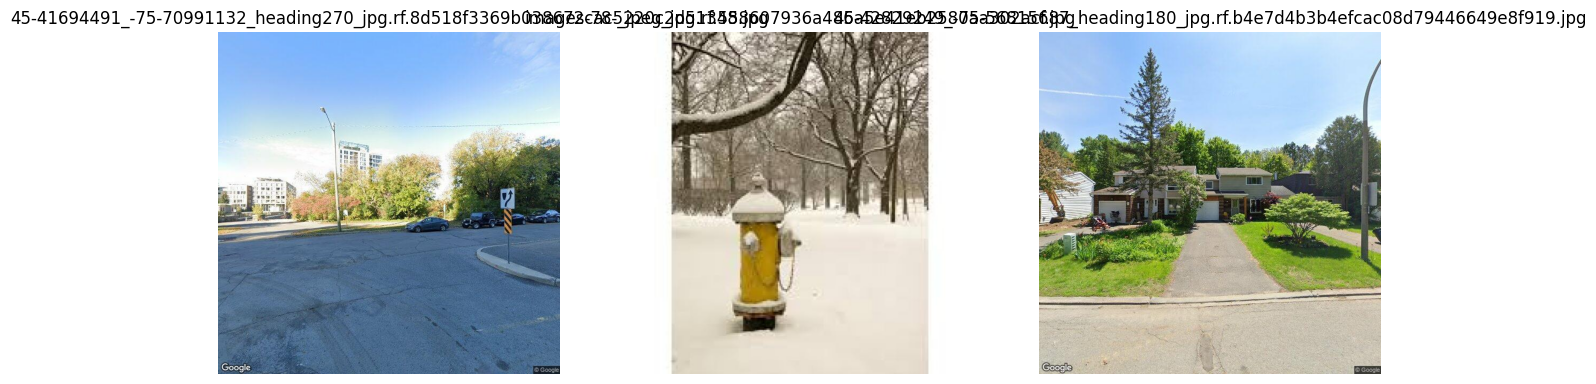

Plotting class distribution for train data
Plotting class distribution for validation data


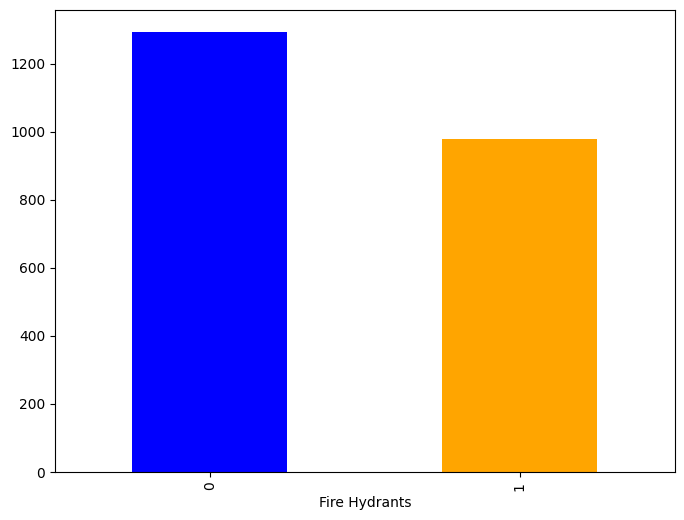

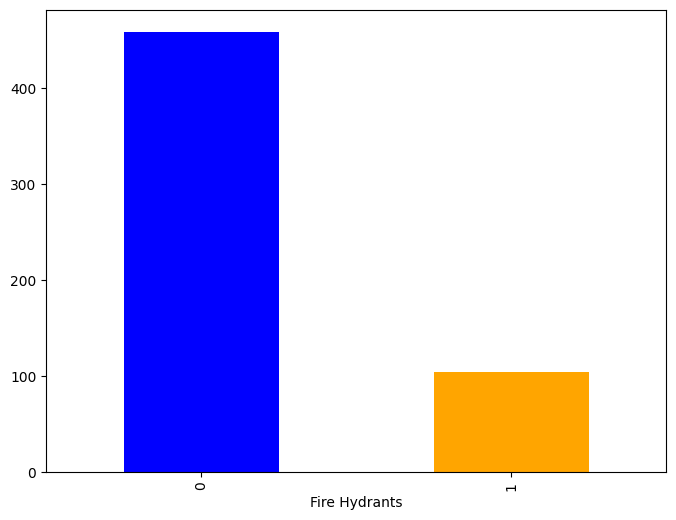

In [3]:
## Enter your code here..

from PIL import Image
import matplotlib.pyplot as plt
import os
import pandas as pd

## Load data set

train_df = pd.read_csv('/content/train/_classes.csv')
valid_df = pd.read_csv('/content/valid/_classes.csv')
print(train_df.head())
print(valid_df.head())
## Images
train_data_path = "/content/train"
valid_data_path = "/content/valid"

## Create a function to show the three images
def show_imgs(folder,num):
  images_files = [f for f in os.listdir(folder) if f.endswith(('.png','.jpg','.jpeg'))]
  selected_images = images_files[:num]
  fig, axes = plt.subplots(1, num, figsize=(15, 5))
  for i, img_file in enumerate(selected_images):
      img_path = os.path.join(folder, img_file)
      img = Image.open(img_path)
      axes[i].imshow(img)
      axes[i].set_title(img_file)
      axes[i].axis('off')
  plt.show()
print('Showing images from train folder')
show_imgs(train_data_path,3)
print('Showing images from validation folder')
show_imgs(valid_data_path,3)
## Plot Class Distribution data
def plot_class_distribution(df, title):
    class_counts = df['Fire Hydrants'].value_counts()
    plt.figure(figsize=(8, 6))
    class_counts.plot(kind='bar', color=['blue', 'orange'])
print('Plotting class distribution for train data')
plot_class_distribution(train_df, 'Class Distribution in Train Data')
print('Plotting class distribution for validation data')
plot_class_distribution(valid_df, 'Class Distribution in Validation Data')

---

### 3) Preprocessing
- Resize images to 128x128.
- Apply any other necessary transformations that you feel can help.

❓ Would one-hot encoding be necessary for binary classification? Why or why not?  
✅ For binary classification, one-hot encoding is not necessary for the target variable or label we are predicting. In binary classification, the target variable typically takes on two values, such as 0 and 1, representing the two classes and thus we do not need to necessiraly use it.

In [4]:
## Enter your code here..
import numpy as np
from PIL import Image
import pandas as pd
import os
train_df = pd.read_csv('/content/train/_classes.csv')
valid_df = pd.read_csv('/content/valid/_classes.csv')
train_data_path = "/content/train/"
valid_data_path = "/content/valid/"
def preprocess_image(image_path):
    img = Image.open(image_path).resize((128, 128))
    img = np.array(img) / 255.0
    return img
train_images = []
train_labels = []
valid_images = []
valid_labels = []
for index, row in train_df.iterrows():
    image_path = os.path.join(train_data_path, row['filename'])
    image = preprocess_image(image_path)
    train_images.append(image)
    train_labels.append(row['Fire Hydrants'])
for index,row in valid_df.iterrows():
    image_path = os.path.join(valid_data_path, row['filename'])
    image = preprocess_image(image_path)
    valid_images.append(image)
    valid_labels.append(row['Fire Hydrants'])

train_images = np.array(train_images, dtype=np.float32)
valid_images = np.array(valid_images, dtype=np.float32)
train_labels = np.array(train_labels, dtype=np.int32)
valid_labels = np.array(valid_labels, dtype=np.int32)

---

### 4) Baseline Model
Create a CNN with:
- Two convolutional layers to extract features from the images.
- Max pooling layers after each convolution to reduce spatial dimensions.
- Fully connected layers to perform classification.
- A sigmoid activation function at the output layer to output a probability between 0 and 1.

Required architecture:
- Input: RGB images resized to 128x128 pixels.
- Conv2d (3 input channels, 32 output channels, kernel size 3, padding 1)
- MaxPool2d (kernel size 2, stride 2, padding 0) – applied after the first Conv2d.
- Conv2d (32 input channels, 64 output channels, kernel size 3, padding 1)
- MaxPool2d (kernel size 2, stride 2, padding 0) – applied after the second Conv2d.
- Flatten
- Linear layer with 128 units
- Output Linear layer with 1 unit and sigmoid activation



This model will be trained to classify whether an image contains a fire hydrant or not.


❓ List three ways to improve the baseline model (e.g., adding dropout to reduce overfitting, using batch normalization to stabilize learning, or increasing the number of layers to capture more complex features). Provide a brief explanation for each.

✅ The principle we are practicing here is the trade between bias-variance such that we can avoid overfitting and underfitting thus generalizing our model(e.g. in other word regularization). Adding dropout for example avoid the model memorizing the data by randomly dropping parameters or neurons, which makes more random, but helps the model learnh more path ways. Batch normalization helps avoid the exploiting or vanishing  gradient which can make the learning un-usable; as well it helps to stabilize the data by making less sensitve to extreme values. Adding or decreasing layers is technique that helps determine how complex our model needs to be, note this depends on what type of relationships we want our models want to find. We can also use data augmentation, training the images on transformation, to help during training and detect key patterns in data.

In [7]:
## Enter your code here..
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras import layers, models

def create_cnn():
    model = models.Sequential()

    # Input layer: RGB images of size 128x128, with 3 channels for the
    # rgb or color components
    model.add(layers.Input(shape=(128, 128, 3)))

    # First convolutional layer , note this was obtained from looking at the tu-
    # torial 6 and looking at documentation plus asking chat for templates
    model.add(layers.Conv2D(32, (3, 3), padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=2, padding='valid'))

    # Second convolutional layer, same as abve to pass
    model.add(layers.Conv2D(32, (3, 3), padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=2, padding='valid'))

    # Flatten the output for fully connected layers
    model.add(layers.Flatten())

    # Fully connected layer with 128 units
    model.add(layers.Dense(128))

    # Output layer with 1 unit and sigmoid activation
    model.add(layers.Dense(1, activation='sigmoid'))

    return model


# Create the model
model = create_cnn()

# Print the model summary
model.summary()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 772.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 114.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.6 MB/s eta 0:00:00


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,204,705 (16.04 MB)

 Trainable params: 4,204,705 (16.04 MB)

 Non-trainable params: 0 (0.00 B)

---

### 5) Training and Evaluation
Train your CNN using Binary Cross Entropy Loss and an Adam optimizer. Use a learning rate of 0.001. Iterate over your dataset for 10 epochs and track the loss.
Evaluate using Precision, Recall, and F1-Score.

❓ Explain why your chosen metric is most appropriate.  
✅ Given the significant class imbalance existing in our data set as shown before, the best metric to evaluate is recall since this evaluate if we can detect the hydrant or not. Our model/system does not have a high associate cost with false positives but with false negatives, thus recall is better. If we want our system to balance these two metrics look at the F1 score.


Display the confusion matrix.

❓ Explain the confusion matrix to a non-technical audience and relate it to your chosen metric.  
✅ Confusion metric can be taught as table that helps you understand the types of errors and their magnitude by the model. This in turns lets you calculate perfomance metrics based on the ratios between type of errors, which can let you deduce different characteristics about the model.

In [8]:
## Enter your code here
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import precision_score, recall_score, f1_score
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten, Input, Resizing
from keras.models import Sequential
cnn_model = create_cnn()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels,
                    epochs=10,
                    batch_size=32,
                    validation_data=(valid_images, valid_labels))

val_predictions = model.predict(valid_images)
val_predictions = (val_predictions > 0.5).astype(int)
# Calculate Precision, Recall, and F1-Score
precision = precision_score(valid_labels, val_predictions)
recall = recall_score(valid_labels, val_predictions)
f1 = f1_score(valid_labels, val_predictions)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Track the loss during training
train_loss = history.history['loss']
val_loss = history.history['val_loss']

print("Training Loss:", train_loss)
print("Validation Loss:", val_loss)

Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 46s 623ms/step - accuracy: 0.6035 - loss: 0.9422 - val_accuracy: 0.6696 - val_loss: 0.6156
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 40s 556ms/step - accuracy: 0.7281 - loss: 0.5359 - val_accuracy: 0.8046 - val_loss: 0.4526
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 40s 560ms/step - accuracy: 0.7600 - loss: 0.4825 - val_accuracy: 0.7478 - val_loss: 0.5162
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 39s 546ms/step - accuracy: 0.8035 - loss: 0.4512 - val_accuracy: 0.7353 - val_loss: 0.5329
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 39s 553ms/step - accuracy: 0.7967 - loss: 0.4391 - val_accuracy: 0.7460 - val_loss: 0.5032
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 40s 557ms/step - accuracy: 0.8202 - loss: 0.4073 - val_accuracy: 0.7815 - val_loss: 0.4706
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 40s 562ms/step - accuracy: 0.8393 - loss: 0.3818 - val_accuracy: 0.8099 - val_loss: 0.4382
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 40s 559ms/step - accuracy: 0.8589 - loss: 0.3531 - val_accu

---


### 6) Model Improvements
Apply and evaluate three improvements that you mentioned in the Baseline CNN question (Step 4).

❓ Which model would you deploy? Why?  
✅ Since our data has class imbalance and we have priority to not the act of detection (i.e we need low false negatives) Recall will be better. The formula is Recall = (TP)/(TP+FN), emphasizing that if we have recall, TP will be abudant which what we want. Precision is TP/(TP+FP) which complicate thigns because is all positives seen which does not offer information on detection. The model with the highest Recall will have been model three I showed below.

In [ ]:
## 1st Ticked Model with batch normalization

from tensorflow.keras import layers, models

def create_cnn2():
    model = models.Sequential()

    # Input: RGB images of size 128x128, 3 channels for color components
    # First convolutional layer
    model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=(128, 128, 3)))
    model.add(layers.BatchNormalization())  # Added batch normalization
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=2))

    # Second convolutional layer
    model.add(layers.Conv2D(64, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())  # Added batch normalization
    model.add(layers.Activation('relu')) # recommend by forums and asked chat
    # for recommendation, he said to add it for gradient flow or avoid gradient
    # problems
    model.add(layers.MaxPooling2D((2, 2), strides=2))

    # Flatten the output for fully connected layers
    model.add(layers.Flatten())

    # Fully connected layer with 128 units
    model.add(layers.Dense(128))
    model.add(layers.BatchNormalization())  # Added batch normalization
    model.add(layers.Activation('relu')) # same idea as before

    # Output layer with 1 unit and sigmoid activation
    model.add(layers.Dense(1))
    model.add(layers.Activation('sigmoid'))

    return model

cnn_model2 = create_cnn2()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels,
                    epochs=10,
                    batch_size=32,
                    validation_data=(valid_images, valid_labels))

val_predictions = model.predict(valid_images)
val_predictions = (val_predictions > 0.5).astype(int)
# Calculate Precision, Recall, and F1-Score
precision = precision_score(valid_labels, val_predictions)
recall = recall_score(valid_labels, val_predictions)
f1 = f1_score(valid_labels, val_predictions)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Track the loss during training
train_loss = history.history['loss']
val_loss = history.history['val_loss']

print("Training Loss:", train_loss)
print("Validation Loss:", val_loss)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.8903 - loss: 0.2883 - val_accuracy: 0.8277 - val_loss: 0.4255
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9171 - loss: 0.2563 - val_accuracy: 0.8242 - val_loss: 0.4152
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9201 - loss: 0.2274 - val_accuracy: 0.7815 - val_loss: 0.4674
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9559 - loss: 0.1850 - val_accuracy: 0.7300 - val_loss: 0.5477
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9603 - loss: 0.1506 - val_accuracy: 0.7726 - val_loss: 0.5057
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9813 - loss: 0.1327 - val_accuracy: 0.7371 - val_loss: 0.6099
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9820 - loss: 0.1170 - val_accuracy: 0.6856 - val_loss: 0.7560
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9861 - loss: 0.0906 - val_accuracy: 0.7052 - v

In [9]:
from tensorflow.keras import layers, models

def create_cnn3():
    model = models.Sequential()

    # Input layer: RGB images of size 128x128 with 3 channels
    model.add(layers.Input(shape=(128, 128, 3)))

    # First convolutional block ( with hidden layer/multilayer perceptron)
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=2, padding='valid'))

    # Second convolutional block, same as above
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=2, padding='valid'))

    # Third convolutional block, same as above
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=2, padding='valid'))

    # Fourth convolutional block, same as above
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=2, padding='valid'))

    # Flatten the output for fully connected layers
    model.add(layers.Flatten())

    # Fully connected layer with 128 units
    model.add(layers.Dense(128, activation='relu'))

    # Output layer with 1 unit and sigmoid activation
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

# Create the model
cnn_model3 = create_cnn3()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels,
                    epochs=10,
                    batch_size=32,
                    validation_data=(valid_images, valid_labels))

val_predictions = model.predict(valid_images)
val_predictions = (val_predictions > 0.5).astype(int)
# Calculate Precision, Recall, and F1-Score
precision = precision_score(valid_labels, val_predictions)
recall = recall_score(valid_labels, val_predictions)
f1 = f1_score(valid_labels, val_predictions)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Track the loss during training
train_loss = history.history['loss']
val_loss = history.history['val_loss']

print("Training Loss:", train_loss)
print("Validation Loss:", val_loss)

Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 42s 579ms/step - accuracy: 0.8717 - loss: 0.3207 - val_accuracy: 0.7265 - val_loss: 0.5319
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 40s 563ms/step - accuracy: 0.9021 - loss: 0.2623 - val_accuracy: 0.7602 - val_loss: 0.4982
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 39s 553ms/step - accuracy: 0.9241 - loss: 0.2359 - val_accuracy: 0.7762 - val_loss: 0.4905
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 39s 545ms/step - accuracy: 0.9275 - loss: 0.2078 - val_accuracy: 0.7709 - val_loss: 0.4889
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 39s 549ms/step - accuracy: 0.9623 - loss: 0.1685 - val_accuracy: 0.8206 - val_loss: 0.4300
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 39s 546ms/step - accuracy: 0.9488 - loss: 0.1768 - val_accuracy: 0.7940 - val_loss: 0.5065
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 39s 552ms/step - accuracy: 0.9650 - loss: 0.1388 - val_accuracy: 0.7531 - val_loss: 0.5942
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 39s 547ms/step - accuracy: 0.9777 - loss: 0.1146 - val_accu

In [ ]:
## Combination from examples from before

from tensorflow.keras import layers, models

def create_cnn4():
    model = models.Sequential()

    # Input layer: RGB images of size 128x128
    model.add(layers.Input(shape=(128, 128, 3)))

    # First convolutional block
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=2, padding='valid'))
    model.add(layers.BatchNormalization())

    # Second convolutional block
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=2, padding='valid'))
    model.add(layers.BatchNormalization())

    # Third convolutional block
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=2, padding='valid'))
    model.add(layers.BatchNormalization())

    # Fourth convolutional block
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=2, padding='valid'))
    model.add(layers.BatchNormalization())

    # Flatten the output for fully connected layers
    model.add(layers.Flatten())

    # Fully connected layer with 256 units
    model.add(layers.Dense(256, activation='relu')) # gradient flow
    model.add(layers.Dropout(0.5))  # Dropout to prevent overfitting

    # Fully connected layer with 128 units
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout to prevent overfitting

    # Output layer with 1 unit and sigmoid activation
    model.add(layers.Dense(1, activation='sigmoid'))

    return model


# Create the model
cnn_model4 = create_cnn4()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels,
                    epochs=10,
                    batch_size=32,
                    validation_data=(valid_images, valid_labels))

val_predictions = model.predict(valid_images)
val_predictions = (val_predictions > 0.5).astype(int)
# Calculate Precision, Recall, and F1-Score
precision = precision_score(valid_labels, val_predictions)
recall = recall_score(valid_labels, val_predictions)
f1 = f1_score(valid_labels, val_predictions)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Track the loss during training
train_loss = history.history['loss']
val_loss = history.history['val_loss']

print("Training Loss:", train_loss)
print("Validation Loss:", val_loss)

Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9980 - loss: 0.0167 - val_accuracy: 0.7211 - val_loss: 1.1493
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9979 - loss: 0.0228 - val_accuracy: 0.6963 - val_loss: 1.2972
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9995 - loss: 0.0101 - val_accuracy: 0.7140 - val_loss: 1.2631
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9964 - loss: 0.0251 - val_accuracy: 0.6998 - val_loss: 1.3830
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9981 - loss: 0.0139 - val_accuracy: 0.6874 - val_loss: 1.3374
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9980 - loss: 0.0176 - val_accuracy: 0.7904 - val_loss: 1.0646
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9980 - loss: 0.0123 - val_accuracy: 0.7105 - val_loss: 1.3518
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9953 - loss: 0.0261 - val_accuracy: 0.7780 - v

---

### 7) Personal Inference Test
Test your trained model on new images (either collected using a camera or collected from the internet). Predict whether each image contains a fire hydrant and print the result.

Of your five images:
- Include at least one image of a fire hydrant that your model does not detect correctly.
- Include at least one image of a fire hydrant that your model does detect correctly.

❓ Explain why you believe your model performed the way it did on each of your five images. What patterns or mistakes do you observe?
✅ I picked model cnn#3 from the previous problem. I chose this one since it has the highest recall value from all the models. It behaved the way it did with the 5 images with hydrant and no hydrant pairs since it seems to look for general shape/contour of the firehydrant, which generally can detect it. However it seems it might get confused if there objects in the images that follow the same general shapes.


In [11]:
## Enter your code here..
!pip install cv2
import cv2
fire1 = cv2.imread('images4.jpg')
fire2 = cv2.imread('images3pg.jpg')
fire3 = cv2.imread('images2.jpg')
fire4 = cv2.imread('images.jpg')
fire5 = cv2.imread('b60cbbb7b378331abf897123fb106cb5.jpg')
nofire1 = cv2.imread('Amenagement_de_la_rue_Queen.jpg')
nofire2 = cv2.imread('Elgin-Street-Buildings-credit-Ottawa-Tourism.jpg')
nofire3 = cv2.imread('IMG_0394.jpg')
nofire4 = cv2.imread('IMG_1882.jpg')

ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


ImportError: No module named 'cv2'

---

In [ ]:
import cv2
import numpy as np
import tensorflow as tf

# Function to preprocess a single image
def preprocess_image(image_path):
    img = cv2.imread(image_path)  # Read image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, (128, 128))  # Resize to match model input size
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# List of image paths
test_images_paths = [
    "images4.jpg", "images3pg.jpg", "images2.jpg", "images.jpg", "b60cbbb7b378331abf897123fb106cb5.jpg",
    "Amenagement_de_la_rue_Queen.jpg", "Elgin-Street-Buildings-credit-Ottawa-Tourism.jpg",
    "IMG_0394.jpg", "IMG_1882.jpg"
] ## Names of all the pictures I got from the internet

# Process all test images
test_images = [preprocess_image(img_path) for img_path in test_images_paths]
## had this for loop, asked internet/chat for making more compact

In [ ]:
#reuse model code
from tensorflow.keras import layers, models
def create_cnn3():
    model = models.Sequential()

    # Input layer: RGB images of size 128x128
    model.add(layers.Input(shape=(128, 128, 3)))
    # CNN pseudo code idea -> chat+stack
    # First convolutional block
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=2, padding='valid'))

    # Second convolutional block
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=2, padding='valid'))

    # Third convolutional block
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=2, padding='valid'))

    # Fourth convolutional block
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=2, padding='valid'))

    # Flatten the output for fully connected layers
    model.add(layers.Flatten())

    # Fully connected layer with 128 units
    model.add(layers.Dense(128, activation='relu'))

    # Output layer with 1 unit and sigmoid activation
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

# Create the model
cnn_model3 = create_cnn3()
# Make predictions
predictions = [cnn_model3.predict(img)[0][0] for img in test_images]
# had it as for loop searched on stack for ways to compressed for readability
# Convert predictions to binary (0 = no fire, 1 = fire)
binary_predictions = [(1 if pred > 0.5 else 0) for pred in predictions]
# had it as for loop searched on stack for ways to compressed for readability
# Display results
for img_path, pred, binary_pred in zip(test_images_paths, predictions, binary_predictions):
    print(f"Image: {img_path} | Prediction Score: {pred:.4f} | Classified as: {'FIRE' if binary_pred == 1 else 'NO FIRE'}")
    # use of pipelining above similar to bash

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Image: images4.jpg | Prediction Score: 0.5012 | Classified as: FIRE
Image: images3pg.jpg | Prediction Score: 0.5000 | Classified as: FIRE
Image: images2.jpg | Prediction Score: 0.5008 | Classified as: FIRE
Image: images.jpg | Prediction Score: 0.5008 | Classified as: FIRE
Image: b60cbbb7b378331abf897123fb106cb5.jpg | Prediction Score: 0.5018 | Classified as: FIRE
Image: Amenagement_de_la_rue_Queen.jpg | Prediction Score: 0.4997 | Classified as: NO FIRE
Image: Elgin-Street-Buildings-credit-Ottawa-Tourism.jpg | Prediction Score: 0.5014 | Classified as: FIRE
Image: IMG_0394.jpg | Prediction Score: 0.4999 | Classified as: NO FIRE
Image: IMG_1882.jp

### 8) Final Thoughts
❓ How would you improve the model in the future?

✅ Give it more epochs to train along with adding a few more layers. We can also use data augmentation, training on rotation on images as well. We can also play around with the combination of many layers we combine, how many epochs more we train, and type of data augmentation.


-----

## Final Question:
### ❓ Did you use AI in completing your assignment. If yes, what AI tool you use and how did you prompt it and how you validate the response.

✅ Your answer here..
Yes I used chatgpt,claude ai, and deepseek to cross verify between them the responses for how to use certain libraries or deal with certain data(say images and the rgb channels). The many phrases I used prompts were along the lines of the followoing:

*   Give an example of how to use the sequential function from keras/pytorch library to build a cnn? Like what functions from the library do we use for this?
*   What libraries are easy to handle cnn creation?




*   How do we deal with rgb channels in images in tensor flow?
*   What are pros and cons for tensor flow and pytorch for cnn training?


*   How to avoid gradient problems in back propagation in cnn?
*   Explain to me what this library is used for (e.g. cv2)? Give me an example of a short command I play with in my console.


*   Explain to me what this part parameter does in this function from this library? (say optimizers in keras for example)
*   Give me a template/logical formula/outline (e.g. pseudocode) for structuring cnn to code in keras

To validate the response I checked with documentation and also checked with labs and notebooks to see if what they doing was sensible. I also cross checked the response with AI and try to back search the code it provided more context to it.








---

## Submission
Submit your `.ipynb` notebook on Brightspace using the following name format:  
`SYSC4415W25_A2_FIRSTNAME_LASTNAME_StudentID.ipynb`

